# Short K_Menas algorithm in order to test images QUICK!

## Import libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

## Load the image and convert from RGB to HEX 

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# Here laod the image
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## Plot the image BEFORE

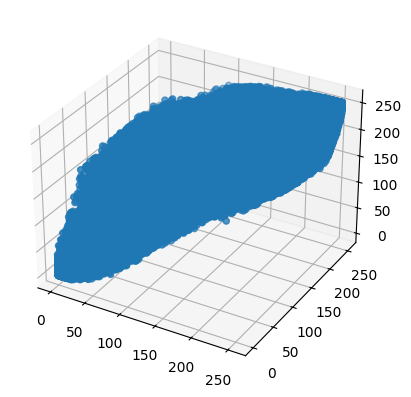

In [3]:
%matplotlib inline

image = cv2.imread(r'images_jpg\1.jpg')

#get rgb values from image to 1D array
r, g, b = cv2.split(image)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(r, g, b)
plt.show()

## Kmean algorithm with ELBOW Method

In [4]:
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler # Correct import
from sklearn.cluster import KMeans
import cv2
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

def extract_colors_elbow(image, show_chart):
    # resize and reshape the image as before
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    # Standardize the RGB values
    scaler = StandardScaler()
    standardized_image = scaler.fit_transform(modified_image) # Standardize modified_image not reshaped_image

    # use the elbow method to find the optimal number of clusters
    distortions = []
    K = range(1,20)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, n_init=100)
        kmeanModel.fit(standardized_image) # Fit on standardized_image
        distortions.append(kmeanModel.inertia_)

    # plot the elbow
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

    # find the elbow point
    kn = KneeLocator(K, distortions, curve='convex', direction='decreasing')
    number_of_colors = kn.knee

    # if the image only has one color, set the number of clusters to 1
    if number_of_colors is None:
        number_of_colors = 1

    # Print the optimal number of clusters
    print(f'The optimal number of clusters is {number_of_colors}')

    # create the model with the optimal number of clusters
    clf = KMeans(n_clusters = number_of_colors, n_init=300)
    labels = clf.fit_predict(standardized_image) # Predict on standardized_image

    counts = Counter(labels)
    counts = dict(sorted(counts.items()))

    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return np.array(rgb_colors), labels, standardized_image # Return standardized_image

## Visulize function code

In [5]:
def visualize_clusters(image, labels, colors):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(colors)):
        cluster_pixels = image[labels == i]
        ax.scatter(cluster_pixels[:,0], cluster_pixels[:,1], cluster_pixels[:,2], 
                   c=RGB2HEX(colors[i]), s=40, label=f"C{i+1}")

    ax.scatter(colors[:,0], colors[:,1], colors[:,2], 
               c="black", s=150, label="Centroids", alpha=1)

    ax.set_title("K-means Clustering on Image")
    plt.legend()
    plt.show()

## Run it!

In [7]:
# Extract the dominant colors and their corresponding labels
rgb_colors, labels, modified_image = extract_colors_elbow(load_image(r'images_jpg\1.jpg'), True) 
# Visualize the clusters
visualize_clusters(modified_image, labels, rgb_colors)

KeyboardInterrupt: 